По сдаче работы №3: есть студенты, получившие замечания по работе, но не исправившие их. Без исправлений работа не будет засчитана.  
Как обнаружить свою принадлежность к данной группе?
1. Заглянуть на гитхаб.  
2. Посмотреть таблицу успеваемости.  

Как вовремя узнавать, что есть замечания?  
1. Читать уведомления на почте, прикрепленной к аккаунту на гитхабе.

# Занятие 3.  
План:
- рассмотреть некоторые полезные и ранее не использованные функции pandas и matplotlib;
- выполнить следующий шаг в анализе ранее полученных физических зависимостей.

## Перенос данных между ноутбуками  
Подходы к переносу кода рассмотрели на предыдущем занятии. Теперь обратимся к переносу данных.   
Рассмотрим numpy.save и pandas.DataFrame.to_pickle

### Подключение диска

Первым делом подключим гугл-диск к машине, на которой исполняется ваш ноутбук. Если вы не хотите это делать, то альтернативой является ручная загрузка/выгрузка файлов с такой машины (отображение содержимого директории может подтормаживать).  

На скриншоте показано, где искать и куда загружать файлы, если работаете с ними в ручную. Файлы хранятся на машине до момента "отключения от среды выполнения", поэтому дублируйте их где-нибудь еще, чтобы не потерять данные. Если работаете с подключенным гугл-диском и используете соответствующую директорию для хранения файлов, то таких проблем не будет.  

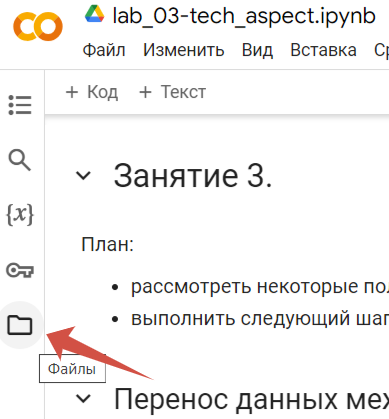

Подключение диска выполнится корректно, только если выдать **все** запрашиваемые права доступа. Запрос происходит после исполнения ячейки кода ниже

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Теперь в интерфейсе "Файлы" (см. скриншот выше) доступна директория drive/MyDrive c содержимым вашего диска. Будем работать в уже выделенной для ноутбуков директории - "/content/drive/MyDrive/Colab Notebooks". Скопировать путь к ней можно в выпадающем списке по нажатию на три точки (см. скриншот). Если дерево файлов не отображается, надо подождать :)  
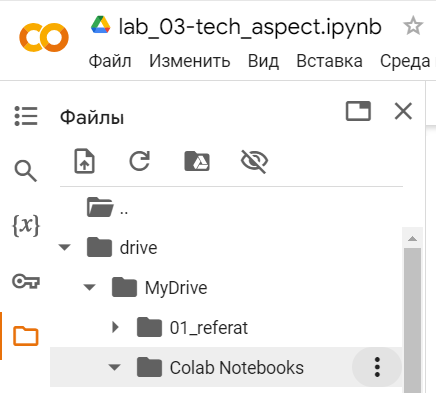

### Выгрузка/загрузка данных

Сейчас мы будем формировать файл данных в старом ноутбуке, а открывать его в новом. Для этого необходимо открыть ноутбуки двух прошлых занятий и повторить манипуляции с подключением диска. Либо в прошлых ноутбуках просто воспользоваться веб-интерфейсом, чтобы выкачать сформированный файл и затем загрузить его на гугл-диск.

1. Откройте файл ЛР01 и выполните все ячейки (Меню вверху страницы: Среда выполнения -> Выполнить все).  
2. В конце ноутбука создайте ячейку с кодом и сохраните массив значений числа протонов/нейтронов, используемый для графика, в файл:  
`np.save('Np_vs_Nn.npy', ps_ns)`.  
3. Скачайте полученный файл, например, через интерфейс (Файлы -> три точки напротив файла Np_vs_Nn.npy -> Скачать).


1. Откройте файл ЛР02 и выполните все ячейки (Меню вверху страницы: Среда выполнения -> Выполнить все).  
2. В конце ноутбука создайте ячейку с кодом и сохраните датафрейм, используемый для графика, в файл:  
`isotopes.to_pickle('isotope_params.pkl')`.  
3. Обновите отображение вкладки "Файлы" (круглая стрелочка вверху) и скачайте полученный файл.

Загрузите файлы на гугл-диск.


In [2]:
# проверяем файлы на диске
!ls -la "/content/drive/MyDrive/Colab Notebooks/mmphp_data/"

total 231
-rw------- 1 root root 228955 Oct  1 08:21 isotope_params.pkl
-rw------- 1 root root   6816 Oct  1 06:46 Np_vs_Nn.npy


#### Загрузка данных в numpy-массив и датафрейм

In [3]:
import numpy as np
import pandas as pd

In [4]:
np_vs_nn = np.load("/content/drive/MyDrive/Colab Notebooks/mmphp_data/Np_vs_Nn.npy")
isotopes = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/mmphp_data/isotope_params.pkl")

Вопрос: файлы каких форматов еще поддерживает pandas?
Найдите в документации pandas функции, начинающиеся на `read_`.  Выпишите их в ячейку ниже ненумерованным списком

<Ваш ответ>

Проверим, что получилось

In [5]:
np_vs_nn.shape

(2, 418)

In [6]:
isotopes.sample(3)

,Z,A,M,N,M_nuclons,mass_kg,m_diff,E_bind_per_nuclon
1146,43,104,103.911434,61.0,1.740907e-25,1.725449e-25,1.545764e-27,8.349146
377,20,46,45.953688,26.0,7.699940e-26,7.630610e-26,6.933015e-28,8.466354
1,1,2,2.014102,1.0,3.347500e-27,3.344416e-27,3.083998e-30,0.866196


In [10]:
# На прошлом занятии мною была допущена ошибка в формировании имен колонок.
# Объясню в следующий раз, но исправим это сейчас.
isotopes.columns

MultiIndex([(                'Z',),
            (                'A',),
            (                'M',),
            (                'N',),
            (        'M_nuclons',),
            (          'mass_kg',),
            (           'm_diff',),
            ('E_bind_per_nuclon',)],
           )

In [15]:
# если код ячейки выше возвращает тип данных MuliIndex, а не Index, то выполните код из этой ячейки
columns = [col[0] for col in isotopes.columns]
isotopes.columns = columns
isotopes.columns # должен получиться тип - Index

Index(['Z', 'A', 'M', 'N', 'M_nuclons', 'mass_kg', 'm_diff',
       'E_bind_per_nuclon'],
      dtype='object')

In [16]:
# заменим файл с датафреймом
isotopes.to_pickle("/content/drive/MyDrive/Colab Notebooks/mmphp_data/isotope_params.pkl")

## Индексация датафрейма по условию, или почему массы атомов в а.е.м. не целые
Технический аспект исследования к вопросу о дробных значениях массы атомов в атомных единицах массы.  

$1\ а.е.м. = \dfrac{1}{12}m(^{12}_6C)$

Индексация датафрейма по условию с использованием метода `.loc`

In [18]:
print('Изотопы углерода')
isotopes.loc[(isotopes['Z'] == 6)]

Изотопы углерода


,Z,A,M,N,M_nuclons,mass_kg,m_diff,E_bind_per_nuclon
54,6,8,8.037643,2.0,1.338540e-26,1.334651e-26,3.889373e-29,2.731000
55,6,9,9.031037,3.0,1.506030e-26,1.499604e-26,6.426273e-29,4.010964
56,6,10,10.016853,4.0,1.673520e-26,1.663298e-26,1.022152e-28,5.741796
57,6,11,11.011433,5.0,1.841010e-26,1.828448e-26,1.256162e-28,6.414828
58,6,12,12.000000,6.0,2.008500e-26,1.992600e-26,1.590000e-28,7.443000
59,6,13,13.003355,7.0,2.175990e-26,2.159207e-26,1.678293e-28,7.251979
60,6,14,14.003242,8.0,2.343480e-26,2.325238e-26,1.824167e-28,7.319284
61,6,15,15.010599,9.0,2.510970e-26,2.492510e-26,1.845999e-28,6.913093
62,6,16,16.014701,10.0,2.678460e-26,2.659241e-26,1.921886e-28,6.747450
63,6,17,17.022579,11.0,2.845950e-26,2.826599e-26,1.935082e-28,6.394145


In [19]:
print('Изотоп углерода с атомной массой, равной 12')
isotopes.loc[(isotopes['Z'] == 6) & (isotopes['A'] == 12)]

Изотоп углерода с атомной массой, равной 12


,Z,A,M,N,M_nuclons,mass_kg,m_diff,E_bind_per_nuclon
58,6,12,12.0,6.0,2.008500e-26,1.992600e-26,1.590000e-28,7.443


In [22]:
print('Масса С-12 в а.е.м.: ', isotopes.loc[(isotopes['Z'] == 6) & (isotopes['A'] == 12)]['M'].values[0])

Масса С-12 в а.е.м.:  12.0


Ответ на вопрос в отношении других атомов кроется как раз в ранее построенном графике удельной энергии связи: масса, приходящаяся на 1 нуклон, зависит от конфигурации атома. Отсюда и появляются дробные значения

In [23]:
from matplotlib import pyplot as plt

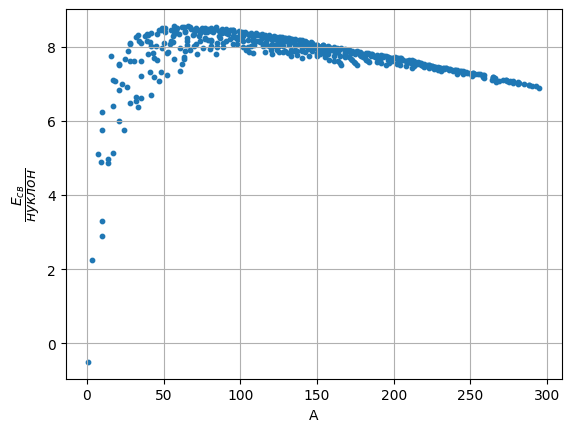

In [27]:
# экспресс способ построения графика - plt.plot/plt.scatter
plt.scatter(isotopes['A'][::7], isotopes['E_bind_per_nuclon'][::7], s=10)
plt.xlabel('A') # ~ ax.set_xlabel
plt.ylabel(r'$\dfrac{E_{св}}{нуклон}$')
plt.grid()

## Визуализация в pandas

In [28]:
?isotopes.plot

Выпишите на русском языке нумерованным списком типы диаграмм, поддерживаемые методом `DataFrame.plot`

<Ваш ответ>

Постройте диаграмму box-and-whisker (ящик с усами) методом `Series.plot`. Прокомментируйте ее характер

<Axes: >

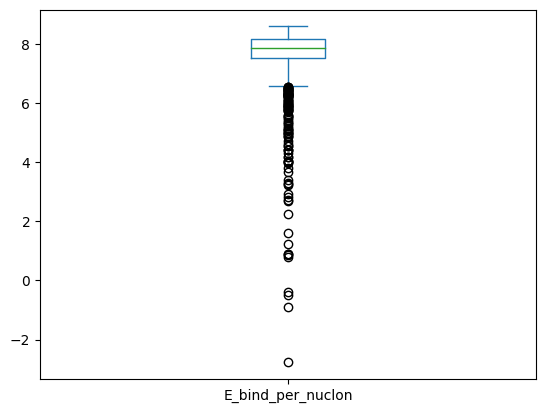

In [34]:
isotopes['E_bind_per_nuclon'].plot(# ваш код...)

<Ваш вывод из графика>

Есть методы и с более контролируемыми параметрами. Например, следующий для гистограмм:

Text(0.5, 0, '$E_{св}/нуклон$')

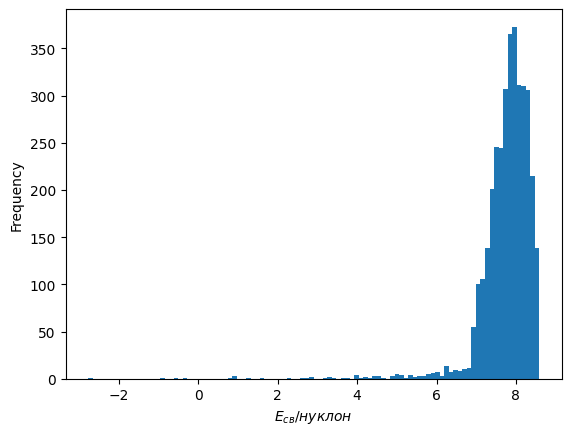

In [40]:
# гистограмма значений
isotopes['E_bind_per_nuclon'].plot.hist(bins=100)
plt.xlabel(r'$E_{св}/нуклон$')

## Место изотопов урана на ранее построенных графиках

### Ранее не изученные детали библиотеки matplotlib  

1. Построение нескольких подграфиков (subplots)

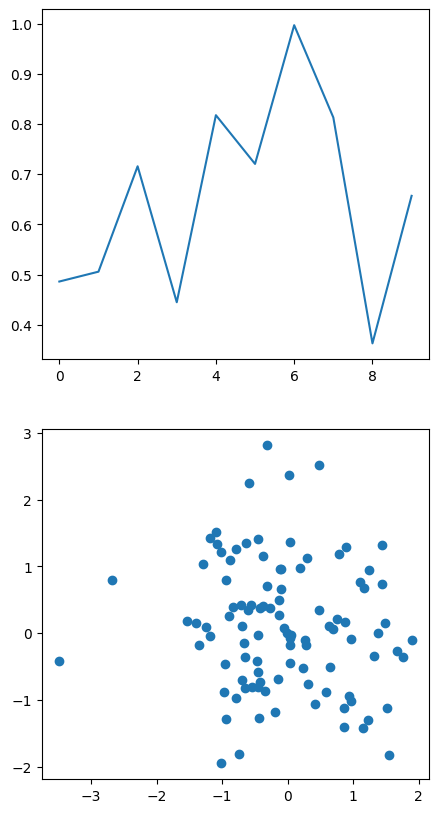

In [53]:
fig, ax = plt.subplots(nrows=2, figsize=(5, 10))
ax[0].plot(np.random.uniform(0, 1, 10))
ax[1].scatter(np.random.normal(size=100), np.random.normal(size=100))

2. Возврат/установка граничных значений осей
3. Обозначения на графике (легенда)

In [54]:
ax[1].get_xlim(), ax[1].get_ylim()

((-3.7526252701490845, 2.1602377012870035),
 (-2.189018866508266, 3.054078323640199))

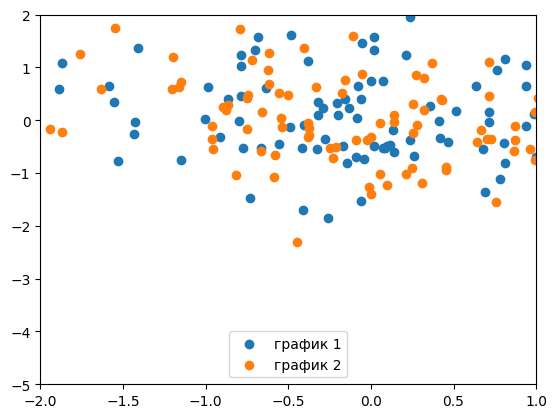

In [62]:
fig, ax = plt.subplots()
ax.scatter(np.random.normal(size=100), np.random.normal(size=100), label='график 1')
ax.scatter(np.random.normal(size=100), np.random.normal(size=100), label='график 2')

ax.set_xlim(-2, 1)
ax.set_ylim(-5, 2)

ax.legend(loc='lower center')

## Задание для самостоятельного выполнения  
Дополнить графики зависимости числа нейтронов от числа протонов (ЛР01) и удельной энергии связи от массового числа (ЛР02) значениями для изотопов урана.

Недостающую информацию по изотопам урана необходимо взять из библиотеки mendeleev. Отберите данные только для природных изотопов (`abundance is not None`)

In [ ]:
# ваш код...

In [ ]:
uranium_nn = ... # np.array
uranium_np = ... # np.array
uranium_en_binding = ... # часть вашего датафрейма из ЛР02 для выбранных изотопов (примените метод loc)

Отрисуйте оба графика рядом (в одну **строку**, а не колонку), используя метод `subplots`.  
Подпишите оси, добавьте легенды.  
График N(p) vs. N(n) в легенде подпишите как "Стабильные изотопы", а график энергии связи - "Изотопы".

In [ ]:
fig, axs = plt.subplots( # ваш код....

Сделайте сетку на графике. Дополните функцию ниже и примените ее для ваших графиков (нарисуйте их повторно ниже)

In [ ]:
def config_plot_coords(ax, step=(10,10)):
  '''
  Настройка координатной сетки графика
    Параметры:
      - ax (plt.Axes): оси графика
      - step (tuple): шаг сетки по абсциссе и ординате
  '''
  xlims, ylims = ...

  ax.set_xticks(np.arange(0, xlims[1], step[0]), minor=True)
  ax.set_yticks(np.arange(0, ylims[1], step[1]), minor=True)
  ax.grid(which='both')

In [ ]:
# ваш код для графика с аккуратной сеткой...

Дополните графики и легенды к ним значениями для изотопов урана.  Расположите легенду левого графика в левом верхем углу, правого - по центру.

Код ниже можете подправить, чтобы он согласовывалася с форматом ваших данных. Легенда должна выглядить примерно так:  
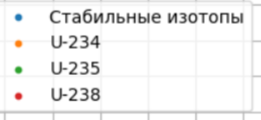

In [ ]:
# ваш код для графика с аккуратной сеткой...

for p,n in zip(uranium_np, uranium_nn):
  axs[0].scatter([p], [n], label = f'U-{int(p+n)}', s=10)

# легенда...


# ваш код для графика с аккуратной сеткой...

for i, data in uranium_en_binding[['A', 'E_bind_per_nuclon']].iterrows():
  axs[1].scatter(data['A'], data['E_bind_per_nuclon'], label = f'U-{data["A"].astype(int)}', s=10, marker='d')

# легенда...